# <center><b>Introduction to Artificial Intelligence</b></center>
## <center>Supervised Learning lab Session </center>
## <center> Random forest </center>
### <center>Zheng LI     20/04/2020</center>

Before present random forest, we need to know what is decision tree.

## Decision tree

Decision tree algorithm is a method to approximate the value of discrete function. It is a typical classification method. It first processes the data, uses inductive algorithms to generate readable rules and decision trees, and then uses the decisions to analyze the new data. In essence, a decision tree is a process of classifying data through a series of rules.


The decision tree algorithm uses a tree structure and uses layer-by-layer reasoning to achieve the final classification. The decision tree consists of the following elements:

 * Root node: complete set containing samples
 * Internal node: corresponding feature attribute test
 * Leaf node: represents the result of the decision

When predicting, a certain attribute value is used to judge at the internal nodes of the tree, which branch node is entered according to the judgment result, and the classification result is obtained until reaching the leaf node.

### 3 steps of decision tree learning

* Feature selection

Feature selection determines which features are used for judgment. In the training data set, there may be many attributes of each sample, and the effects of different attributes may vary. Therefore, the function of feature selection is to filter out features that are highly correlated with the classification result, that is, features with strong classification ability.

The criterion commonly used in feature selection is: information gain.

* Decision tree generation

After selecting the features, trigger from the root node, calculate the information gain of all features for the node, select the feature with the largest information gain as the node feature, and establish child nodes according to the different values of the feature; use the same method to generate each child node New child nodes until the information gain is small or there are no features to choose from.

* Decision tree pruning

The main purpose of pruning is to combat "overfitting" and reduce the risk of overfitting by actively removing some branches.

## Random Forest

Random forest is composed of many decision trees, and there is no correlation between different decision trees.

When we perform the classification task, new input samples are entered, and each decision tree in the forest is judged and classified separately. Each decision tree will get its own classification result, which one of the classification results of the decision tree At most, then Random Forest will treat this result as the final result.


<center><img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/06/random-forest7.png"></center>

### 4 steps to construct a random forest

If there are N samples, there are randomly selected N samples to be replaced (select one sample at a time randomly, and then return to continue selection). The selected N samples are used to train a decision tree as the sample at the root node of the decision tree.
    
When each sample has M attributes, when each node of the decision tree needs to be split, m attributes are randomly selected from the M attributes, satisfying the condition m << M. Then use some strategy (such as information gain) from the m attributes to select one attribute as the split attribute of the node.
     
During the formation of the decision tree, each node must be split according to step 2 (it is easy to understand that if the next attribute selected by the node is the one that was used when the parent node was split, the node has reached the leaf Node, no need to continue to split). Until it can no longer be divided. Note that there is no pruning during the entire decision tree formation process.
     
Follow steps 1 ~ 3 to build a large number of decision trees, thus forming a random forest.

### The advantages and disadvantages of random forest

Advantage

 * It can come out with very high-dimensional (many features) data, and there is no need for dimension reduction and feature selection.
 * It can judge the importance of features.
 * Can determine the interaction between different features.
 * Not easy to overfit.
 * The training speed is relatively fast, and it is easy to make a parallel method.
 * Relatively simple to implement.
 * For unbalanced data sets, it can balance errors
 * If a large part of the features are lost, the accuracy can still be maintained.

Disadvantages

 * Random forests have been shown to overfit on some noisy classification or regression problems.
 * For data with attributes with different values, attributes with more value divisions will have a greater impact on the random forest, so the attribute weights produced by the random forest on this data are not credible.
---

## Basic tests on simulated data to show the influence of parameters and hyper-parameters

In [1]:
import tqdm
import numpy as np
import ast
import os
import pandas as pd

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution as our tests.

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers is the number of classes. 

Hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function.

In [2]:
### Generate blobs.
from sklearn.datasets import make_blobs
x_blobs,y_blobs = make_blobs(n_samples=2000,n_features=2,centers=4,random_state=0)

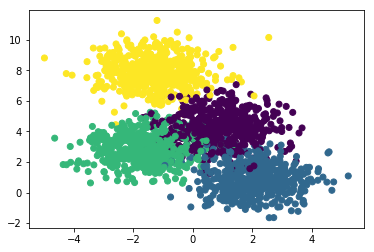

In [3]:
### Plot.
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(x_blobs[:,0],x_blobs[:,1],c=y_blobs) 

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

Now that we have generated a simple dataset, let's try to do a basic supervised learning approach by using RF. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_blobs,y_blobs,test_size=0.2,random_state=0)

Check the shapes of the generated vectors.

In [6]:
x_train.shape, x_test.shape, x_blobs.shape,y_train.shape

((1600, 2), (400, 2), (2000, 2), (1600,))

In sklearn, the <b>functional model</b> of random forest is:

    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


The parameters that RF needs to adjust include two parts. The first part is the parameters of the Bagging framework, and the second part is the parameters of the CART decision tree. Below we make an introduction to these parameters.

### RF framework parameters

There are relatively few important frame parameters of RF, and the main concern is n_estimators

* <b>n_estimators</b>: the number of decision trees in the forest.

This attribute is a typical model performance factor that is inversely proportional to model efficiency. Even so, you should still increase this number as much as possible to make your model more accurate and stable.


### RF decision tree parameters

* <b>max_features</b>: The number of attributes to consider when looking for the best split point. Optional values, int (specific number), float (percentage of number), string ("auto", "sqrt", "log2").

This attribute is set for a single tree. Generally speaking, the larger the value, the more attributes a single tree can consider, and the better the model performance. But this is not certain, but one thing is certain, increasing this value will cause the algorithm to run slower, so we need to consider to reach a balance.

* The maximum depth of the decision tree <b>max_depth</b>: You can not enter the default, if you do not enter, the decision tree will not limit the depth of the subtree when building the subtree. Generally speaking, this value can be ignored when there are few data or features. If the model has a large sample size and many features, it is recommended to limit this maximum depth. The specific value depends on the data distribution. Commonly used values can be between 10-100.

* <b>min_samples_split</b>: This value limits the conditions under which the subtree can continue to be divided. If the number of samples in a node is less than min_samples_split, it will not continue to try to select the best feature to divide. The default is 2. If the sample size is not large, you do not need to control this value. If the sample size is very large, it is recommended to increase this value.

* <b>min_samples_leaf</b>: The minimum number of samples that should be on the leaf node. int (specific number), float (percentage of number).
The model with smaller number of nodes is more susceptible to noise data. I usually set this value to greater than 50, but you need to find the best value for you.

Generally, the adjustment order of random forest parameters is: n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf.

max_features can coarsely adjust the structure of the tree, and the search space can be larger; min_samples_split, min_samples_leaf can adjust the structure of the tree more finely, and the search space can be smaller.

---

Let's use a Krandom forest classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 


To use a random forest with sklearn, you have to use the class [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier.fit), you can use it to make prediction with [object.predict](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier.score).

In [7]:
### Train the classifier and get the accuracy in both sets.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(oob_score=True, random_state=10)
classifier.fit(x_train,y_train)
print(classifier.predict(x_test))
print("Out-of bag score:%f"%classifier.oob_score_)
print("Accuracy of train set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(x_test,y_test)*100))

[1 1 2 2 0 1 0 2 1 2 2 2 3 0 3 0 3 3 3 1 0 2 2 2 1 2 2 1 0 2 3 1 2 3 0 0 3
 1 3 0 3 0 3 2 1 1 2 0 3 0 0 3 3 0 0 2 3 2 2 0 0 2 0 1 3 1 3 0 3 1 1 2 2 0
 0 1 3 2 1 0 0 3 2 3 1 3 0 0 2 1 1 2 3 3 1 0 2 2 1 0 2 2 2 3 1 0 0 1 3 2 2
 3 1 2 3 3 0 0 3 0 3 0 3 2 3 3 0 2 3 1 1 1 3 0 0 2 3 3 2 3 2 1 1 3 1 0 3 3
 0 0 3 2 1 1 2 0 1 1 1 0 3 3 1 3 2 2 3 0 2 2 0 0 0 3 0 3 1 3 2 1 2 3 1 2 1
 0 3 0 1 0 2 3 3 3 1 3 2 0 1 3 0 3 1 1 1 2 2 3 2 0 0 2 0 0 1 1 3 3 3 0 0 3
 1 0 1 3 1 1 1 2 2 0 2 0 0 0 3 2 1 2 3 2 1 1 2 3 2 0 2 0 1 3 1 3 3 0 2 2 1
 1 0 1 0 2 3 2 1 0 1 3 0 2 2 2 1 3 0 1 3 0 3 1 0 1 3 2 0 3 0 1 3 1 2 2 0 3
 3 2 0 2 1 2 2 2 1 1 1 3 1 1 0 1 1 1 3 0 2 1 0 0 3 2 1 0 1 1 3 0 2 2 0 3 1
 2 3 2 1 0 2 1 1 0 3 3 1 1 1 2 0 3 1 1 0 3 0 1 3 1 0 1 0 1 2 2 3 2 3 2 0 0
 3 1 3 3 1 2 0 2 0 1 0 0 0 3 0 0 1 2 0 3 2 2 2 0 3 2 3 2 1 3]
Out-of bag score:0.925000
Accuracy of train set 100.0%
Accuracy of test set 92.75%


We first perform a search on n_estimators.

100%|██████████| 150/150 [00:59<00:00,  2.54it/s]


Best n_estimators: 86
Best accuracy for test set 92.75%
0.92125


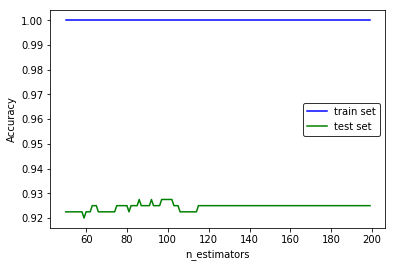

In [39]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(50,200)  # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=10)
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best n_estimators: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


Best max_features: 1
Best accuracy for test set 92.75%
0.9225


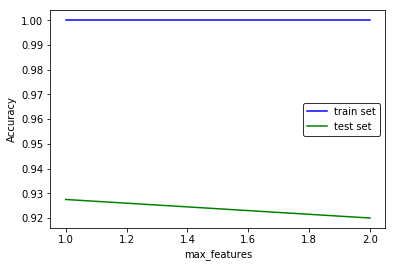

In [92]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = [1,2] # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=86,max_features= k, oob_score=True, random_state=10)
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best max_features: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

In this way, we get the best number of weak learner iterations and the max_features, and then we perform a search on the maximum depth of the decision tree max_depth and the minimum number of samples required to subdivide the internal nodes min_samples_split.

In [94]:
test_ks1 = range(1,15)
test_ks2 = range(50,200,5)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=86,max_features=1,max_depth=k1,min_samples_split=k2, oob_score=True, random_state=10)
        classifier_new.fit(x_train,y_train)
        train_acc.append(classifier_new.score(x_train,y_train))
        test_acc.append(classifier_new.score(x_test,y_test))
    print("When max_depth is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 1
Best min_samples_split: 50
Best accuracy for test set 72.0%
0.725625


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 2
Best min_samples_split: 50
Best accuracy for test set 91.0%
0.908125


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 3
Best min_samples_split: 50
Best accuracy for test set 93.5%
0.92125


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 4
Best min_samples_split: 55
Best accuracy for test set 93.75%
0.92375


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 5
Best min_samples_split: 65
Best accuracy for test set 93.75%
0.928125


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 6
Best min_samples_split: 110
Best accuracy for test set 94.0%
0.92625


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 7
Best min_samples_split: 75
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 8
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.92875


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 9
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 10
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 11
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 12
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When max_depth is 13
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


100%|██████████| 30/30 [00:09<00:00,  3.18it/s]

When max_depth is 14
Best min_samples_split: 80
Best accuracy for test set 94.0%
0.9275


By comparison, we find that when (max_depth,min_sample_split)=(7,75), the sccuracy is the highest. And our out of bag score has improved to a certain extent, indicating that the generalization ability of the model has been enhanced.

For the minimum number of samples min_samples_split required for the internal node subdivision, we cannot set it together for the time being, because this is also related to other parameters of the decision tree. Next, we will divide the minimum sample number min_samples_split of the internal node and the minimum sample number min_samples_leaf of the leaf node to adjust the parameters together.

In [98]:
test_ks1 = range(1,60,5)
test_ks2 = range(50,200,5)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=86,max_features=1,max_depth=7,min_samples_leaf=k1,min_samples_split=k2, oob_score=True, random_state=10)
        classifier_new.fit(x_train,y_train)
        train_acc.append(classifier_new.score(x_train,y_train))
        test_acc.append(classifier_new.score(x_test,y_test))
    print("When min_samples_leaf is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 1
Best min_samples_split: 75
Best accuracy for test set 94.0%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 6
Best min_samples_split: 85
Best accuracy for test set 94.0%
0.926875


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 11
Best min_samples_split: 75
Best accuracy for test set 93.75%
0.926875


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 16
Best min_samples_split: 70
Best accuracy for test set 93.75%
0.925625


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 21
Best min_samples_split: 65
Best accuracy for test set 93.75%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 26
Best min_samples_split: 75
Best accuracy for test set 93.75%
0.9275


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 31
Best min_samples_split: 75
Best accuracy for test set 93.5%
0.92625


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 36
Best min_samples_split: 50
Best accuracy for test set 93.5%
0.92375


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 41
Best min_samples_split: 50
Best accuracy for test set 93.5%
0.923125


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 46
Best min_samples_split: 50
Best accuracy for test set 93.5%
0.9225


  0%|          | 0/30 [00:00<?, ?it/s]

When min_samples_leaf is 51
Best min_samples_split: 50
Best accuracy for test set 93.5%
0.9225


100%|██████████| 30/30 [00:08<00:00,  3.49it/s]

When min_samples_leaf is 56
Best min_samples_split: 115
Best accuracy for test set 93.5%
0.923125


The final model fit:

In [9]:
classifier_final = RandomForestClassifier(n_estimators=86,max_features=1,max_depth=7,min_samples_leaf=1,min_samples_split=75, oob_score=True, random_state=10)
classifier_final.fit(x_train,y_train)
print(classifier_final.predict(x_test))
print("Out-of bag score:%f"%classifier_final.oob_score_)
print("Accuracy of train set {}%".format(classifier_final.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier_final.score(x_test,y_test)*100))

[1 1 2 2 0 1 0 2 1 2 2 2 3 0 3 0 3 3 3 1 0 2 2 2 1 2 2 1 0 2 3 1 2 3 0 0 3
 1 3 1 3 0 3 2 1 1 2 0 3 0 0 3 3 0 0 2 3 2 2 0 0 2 0 1 3 1 3 0 3 1 1 0 2 0
 0 1 3 2 1 0 0 3 2 3 1 3 0 2 2 1 1 2 3 3 1 0 2 2 1 0 2 2 2 3 1 0 0 1 3 2 2
 3 1 2 3 3 0 0 3 0 3 0 3 2 3 3 0 2 3 1 1 1 3 0 0 2 3 3 2 3 2 1 1 3 0 0 3 3
 0 0 3 2 1 1 2 1 1 1 1 0 3 3 1 3 2 2 3 0 2 2 0 2 0 3 0 3 1 3 2 1 2 3 1 2 1
 0 3 0 1 0 2 3 3 3 1 3 2 0 1 3 0 3 1 1 1 2 2 3 2 2 0 2 0 0 1 1 3 3 3 0 0 3
 1 0 1 3 1 1 1 2 2 0 2 0 0 0 3 2 1 2 3 2 1 1 2 3 2 0 2 0 1 3 1 3 3 0 2 2 1
 1 0 1 0 2 3 2 1 0 1 3 0 2 2 2 1 3 0 1 3 0 3 1 0 1 3 2 0 3 0 1 3 1 2 2 0 3
 3 2 0 2 1 2 2 2 1 1 1 3 1 1 0 1 1 1 3 2 2 1 0 0 3 2 1 0 1 1 3 0 2 2 0 3 1
 2 3 2 1 0 2 1 1 0 3 3 1 1 1 2 0 3 1 1 0 3 0 1 3 1 0 1 0 1 2 2 3 2 3 2 0 0
 3 1 3 3 1 2 0 2 0 1 0 0 0 3 0 0 1 2 0 3 2 2 2 0 3 2 3 2 1 3]
Out-of bag score:0.928750
Accuracy of train set 93.8125%
Accuracy of test set 94.0%


Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png"></center>

* Precision: What is the percentage of cases your model correctly classified while predicting a given class?　Precision reflects the model's ability to distinguish negative samples. The higher the precision, the stronger the model's ability to distinguish negative samples.
* Recall: What is the percentage of cases your model correctly classified while predicting examples belonging to a given class?　Ｒecall embodies the classification model H's ability to recognize positive samples. The higher the recall, the stronger the model's ability to recognize positive samples.
* F1 Score: Harmonic mean from precision and recall.　The higher the F1-score, the more robust the classification model．

Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

[[404   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 399]]


Text(0, 0.5, 'Predicted class')

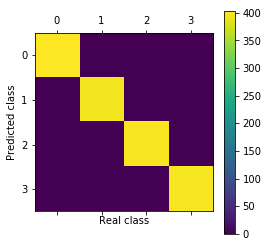

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        96
           1       0.95      0.93      0.94       103
           2       0.90      0.87      0.88       100
           3       1.00      1.00      1.00       101

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

[[ 87   3   6   0]
 [  3  96   4   0]
 [ 11   2  87   0]
 [  0   0   0 101]]


Text(0, 0.5, 'Predicted class')

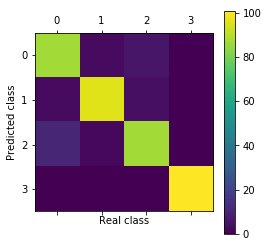

In [11]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

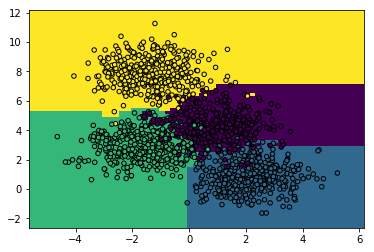

In [9]:
from matplotlib.colors import ListedColormap

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Generating PyRat datasets
--
First, you need the latest version of PyRat. To obtain it, clone the [official PyRat repository](https://github.com/vgripon/pyrat). 

Syntax is "git clone repo destinationdir".

In [13]:
### TO DO: open a terminal tab / window and clone the repo.

You can now launch Pyrat Games. 

In the context of the AI course, we are going to simplify the rules of PyRat a bit.
In fact, we are going to remove all walls and mud penalties. Also, we are not going to consider symmetric mazes anymore.

As such, a default game is launched with the following parameters:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric</pre>

In the supervised and unsupervised projects, we are going to look at plays between two greedy algorithms. Generating 1000 such games while saving data is easily obtained with PyRat:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric --rat AIs/manh.py --python AIs/manh.py --tests 1000 --nodrawing --synchronous --save</pre>

We recommend that you open another terminal to launch this command. Generating 1000 games will take a few minutes, and you won't be able to evaluate any other cell from the jupyter notebook. 

It is possible to open a terminal window from the "Home" Interface of Jupyter Notebook.

PS: If you don't have pygame installed in your machine, open a terminal and run:

<pre>pip install pygame</pre>

The 1000 generated games will be in the "saves" folder.

In [14]:
### TO DO: open a terminal tab / window and launch the command to generate the games.

To convert the games into numpy arrays, we use a few functions that we define here. Feel free to modify it later to your own needs.

In [15]:
mazeHeight = 15
mazeWidth = 21


def convert_input(maze, mazeWidth, mazeHeight, piecesOfCheese):
    im_size = (mazeWidth, mazeHeight) 
    canvas = np.zeros(im_size,dtype=np.int8)
    for (x_cheese,y_cheese) in piecesOfCheese:
        canvas[x_cheese,y_cheese] = 1
    # to use it with sklearn, we flatten the matrix into an vector
    return canvas.ravel()


PHRASES = {
    "# Random seed\n": "seed",
    "# MazeMap\n": "maze",
    "# Pieces of cheese\n": "pieces"    ,
    "# Rat initial location\n": "rat"    ,
    "# Python initial location\n": "python"   , 
    "rat_location then python_location then pieces_of_cheese then rat_decision then python_decision\n": "play"
}
 
MOVE_DOWN = 'D'
MOVE_LEFT = 'L'
MOVE_RIGHT = 'R'
MOVE_UP = 'U'
 
translate_action = {
    MOVE_LEFT:0,
    MOVE_RIGHT:1,
    MOVE_UP:2,
    MOVE_DOWN:3
}


def process_file(filename):
    f = open(filename,"r")    
    info = f.readline()
    params = dict(play=list())
    while info is not None:
        if info.startswith("{"):
            params["end"] = ast.literal_eval(info)
            break
        if "turn " in info:
            info = info[info.find('rat_location'):]
        if info in PHRASES.keys():
            param = PHRASES[info]
            if param == "play":
                rat = ast.literal_eval(f.readline())
                python = ast.literal_eval(f.readline())
                pieces = ast.literal_eval(f.readline())
                rat_decision = f.readline().replace("\n","")
                python_decision = f.readline().replace("\n","")
                play_dict = dict(
                    rat=rat,python=python,piecesOfCheese=pieces,
                    rat_decision=rat_decision,python_decision=python_decision)
                params[param].append(play_dict)
            else:
                params[param] = ast.literal_eval(f.readline())
        else:
            print("did not understand:", info)
            break
        info = f.readline()
    return params

Now, we are ready to parse the "saves" folder in order to generate the data into a numpy array. 

**N.b. you don't have to run this cell if you only want to run through the provided correction of TP1. We provide a npz file with a saved dataset**

In [16]:
games = list()
directory = "/home/zheng/Documents/AI/2/PyRat/saves/"  ## to modify
for root, dirs, files in os.walk(directory):
    for filename in tqdm.tqdm(files):
        try:
            if filename.startswith("."):
                continue
            game_params = process_file(directory+filename)
            games.append(game_params)
        except:
            print("Filename {} did not work".format(filename))

x = np.array([]).reshape(0,mazeWidth * mazeHeight)
y = np.array([]).reshape(0,1)
wins_python = 0
wins_rat = 0
for game in tqdm.tqdm(games):
    if game["end"]["win_python"] == 1: 
        wins_python += 1
    elif game["end"]["win_rat"] == 1:
        wins_rat += 1    
    canvas = convert_input(game["maze"], mazeWidth, mazeHeight, game["play"][0]["piecesOfCheese"])
    if game["end"]["win_python"] == 1:
        y = np.append(y,1)
    elif game["end"]["win_rat"] == 1:
        y = np.append(y,-1)
    else:
        y = np.append(y,0)
    x = np.concatenate([x, canvas.reshape(1,-1)], axis=0)

100%|██████████| 1000/1000 [00:00<00:00, 1646.47it/s]


x and y are numpy array, feel free to save them to a .npz file as seen in TP0. 

In [18]:
print(x.shape,y.shape)
np.savez("dataset.npz",x=x,y=y)

(1000, 315) (1000,)


Predicting the winner in PyRat based on the initial cheese configuration
--

Now it is your turn, generate a PyRat dataset, load it in the notebook and evaluate RF classifier using sklearn.


In [5]:
x = np.load("dataset.npz")['x']
y = np.load("dataset.npz")['y']

Now with the dataset loaded we can explore it using matplotlib. Matplotlib is a very powerful python graphics display library.

We are going to be showing the games initial state and the winner of each match. The games are represented by two variables X and Y.

X is a matrix with 1000 examples of length 315. Each example can be resized to the real maze shape of 21 by 15. Each data point of the example vector has two possible values. 1 for presence of cheese and 0 for absence of cheese.

Y is a scalar integer that ranges from -1 to 1. 1 represents a win by the python, 0 a draw and -1 a win for the rat.

The magic command "%matplotlib inline" tells jupyter notebook to display the plot results in the document, instead of opening a separate window.


[[[0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 1. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 1. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 1. 0. ... 1. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


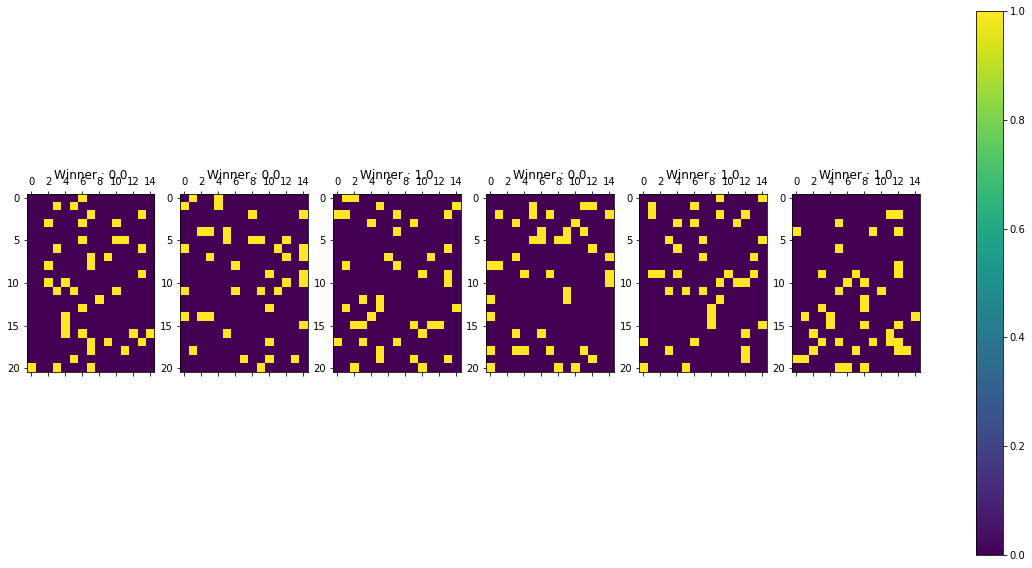

In [6]:
from matplotlib.colors import ListedColormap
x_labyrinth = x.reshape(1000,21,15)
print(x_labyrinth)
afew = 6 # Number of samples
fig, axis = plt.subplots(1,afew,figsize=(20,10)) # Generate a new figure with one row of 5 plots. We also set the size 20,10
for i in range(afew):
    ind = np.random.randint(x_labyrinth.shape[0]) #sample a game
    ax = axis[i] # get the corresponding axis to use
    img = ax.matshow(x_labyrinth[ind]) #Show the matrix as an image
    ax.set_title('Winner : {}'.format(y[ind])) # Set the axis title with the game winner
fig.colorbar(img,ax=axis) # add a colorbar for each image

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
x_train.shape, x_test.shape, x_blobs.shape,y_train.shape

((800, 315), (200, 315), (2000, 2), (800,))

Before processing, consider [Class Imbalance](http://www.chioka.in/class-imbalance-problem/). This problem can create a bias in most algorithms leading to a poor recall percentage.

In [9]:
### Train the classifier and get the accuracy in both sets.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(oob_score=True, random_state=10,class_weight="balanced")
classifier.fit(x_train,y_train)
print(classifier.predict(x_test))
print("Out-of bag score:%f"%classifier.oob_score_)
print("Accuracy of train set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(x_test,y_test)*100))

[ 1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.
  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.
 -1.  1.]
Out-of bag score:0.468750
Accuracy of train set 100.0%
Accuracy of test set 50.5%


100%|██████████| 120/120 [02:11<00:00,  1.09s/it]


Best n_estimators: 222
Best accuracy for test set 56.00000000000001%
0.50125


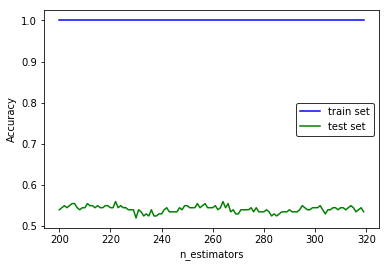

In [25]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(200,320)  # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=10,class_weight="balanced")
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best n_estimators: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

100%|██████████| 157/157 [06:41<00:00,  2.55s/it]


Best max_features: 279
Best accuracy for test set 56.99999999999999%
0.4525


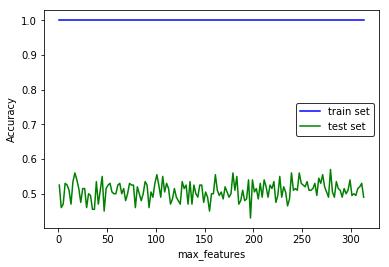

In [31]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(1,315,2) # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=222,max_features= k, oob_score=True, random_state=10,class_weight="balanced")
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best max_features: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

In [46]:
test_ks1 = range(20,40,5)
test_ks2 = range(2,15,2)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=222,max_features=279,max_depth=k1,min_samples_split=k2, oob_score=True, random_state=10,class_weight="balanced")
        classifier_new.fit(x_train,y_train)
        train_acc.append(classifier_new.score(x_train,y_train))
        test_acc.append(classifier_new.score(x_test,y_test))
    print("When max_depth is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/7 [00:00<?, ?it/s]

When max_depth is 20
Best min_samples_split: 6
Best accuracy for test set 54.0%
0.48


  0%|          | 0/7 [00:00<?, ?it/s]

When max_depth is 25
Best min_samples_split: 2
Best accuracy for test set 57.49999999999999%
0.47875


  0%|          | 0/7 [00:00<?, ?it/s]

When max_depth is 30
Best min_samples_split: 2
Best accuracy for test set 56.99999999999999%
0.47625


100%|██████████| 7/7 [00:24<00:00,  3.50s/it]

When max_depth is 35
Best min_samples_split: 2
Best accuracy for test set 56.99999999999999%
0.47625


In [47]:
test_ks1 = range(1,15)
test_ks2 = range(2,15)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=222,max_features=279,max_depth=25,min_samples_leaf=k1,min_samples_split=k2, oob_score=True, random_state=10,class_weight="balanced")
        classifier_new.fit(x_train,y_train)
        train_acc.append(classifier_new.score(x_train,y_train))
        test_acc.append(classifier_new.score(x_test,y_test))
    print("When min_samples_leaf is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 1
Best min_samples_split: 2
Best accuracy for test set 57.49999999999999%
0.47875


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 2
Best min_samples_split: 12
Best accuracy for test set 54.50000000000001%
0.48125


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 3
Best min_samples_split: 10
Best accuracy for test set 51.0%
0.45


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 4
Best min_samples_split: 2
Best accuracy for test set 52.5%
0.4625


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 5
Best min_samples_split: 13
Best accuracy for test set 53.5%
0.46125


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 6
Best min_samples_split: 2
Best accuracy for test set 48.0%
0.44875


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 7
Best min_samples_split: 2
Best accuracy for test set 48.5%
0.4675


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 8
Best min_samples_split: 2
Best accuracy for test set 47.5%
0.45125


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 9
Best min_samples_split: 2
Best accuracy for test set 46.5%
0.45375


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 10
Best min_samples_split: 2
Best accuracy for test set 44.5%
0.4625


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 11
Best min_samples_split: 2
Best accuracy for test set 43.5%
0.44


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 12
Best min_samples_split: 2
Best accuracy for test set 48.0%
0.4525


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 13
Best min_samples_split: 2
Best accuracy for test set 44.0%
0.45375


100%|██████████| 13/13 [00:31<00:00,  2.40s/it]

When min_samples_leaf is 14
Best min_samples_split: 2
Best accuracy for test set 44.5%
0.44


In [10]:
classifier_final = RandomForestClassifier(n_estimators=222,max_features=276,max_depth=25,min_samples_leaf=1,min_samples_split=2, oob_score=True, random_state=10,class_weight="balanced")
classifier_final.fit(x_train,y_train)
print(classifier_final.predict(x_test))
print("Out-of bag score:%f"%classifier_final.oob_score_)
print("Accuracy of train set {}%".format(classifier_final.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier_final.score(x_test,y_test)*100))

[-1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.
 -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.
 -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.
 -1.  1.]
Out-of bag score:0.473750
Accuracy of train set 100.0%
Accuracy of test set 54.0%


Training Set:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       347
         0.0       1.00      1.00      1.00        93
         1.0       1.00      1.00      1.00       360

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[[347   0   0]
 [  0  93   0]
 [  0   0 360]]


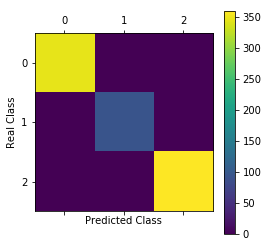

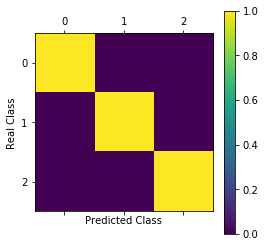

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier_final.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
normalized_matrix = matrix/np.sum(matrix,axis=1)
print("Training Set:")
print(report)
print(matrix)

plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

/home/zheng/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Set:
              precision    recall  f1-score   support

        -1.0       0.55      0.59      0.57        92
         0.0       0.00      0.00      0.00        22
         1.0       0.53      0.63      0.58        86

    accuracy                           0.54       200
   macro avg       0.36      0.40      0.38       200
weighted avg       0.48      0.54      0.51       200

[[54  0 38]
 [13  0  9]
 [32  0 54]]
[[0.58695652 0.         0.44186047]
 [0.14130435 0.         0.10465116]
 [0.34782609 0.         0.62790698]]


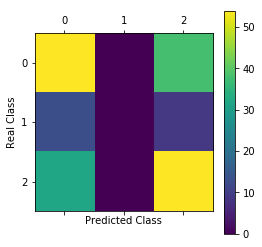

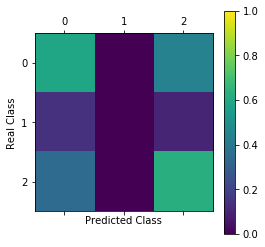

In [13]:
y_pred_test = classifier_final.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
normalized_matrix = matrix/np.sum(matrix,axis=1)

print("Test Set:")
print(report)
print(matrix)
print(normalized_matrix)


plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

---
PCA dimension reduction drawing decision boundary then make a binary classification between Pyrat and python wins

In [92]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA   
pca=PCA(n_components=2)  
new_x=pca.fit_transform(x)
new_y=y
print(new_x.shape)
print(new_y.shape)

(1000, 2)
(1000,)


In [93]:
itemindex = np.argwhere(new_y == 0)
print (itemindex)
new_y2=np.delete(new_y, itemindex)
print(y2)
new_x2=np.delete(new_x, itemindex,axis=0)
print(new_x2)
print(new_x2.shape)

[[  7]
 [ 15]
 [ 16]
 [ 18]
 [ 19]
 [ 25]
 [ 52]
 [ 53]
 [ 72]
 [ 79]
 [ 83]
 [ 89]
 [100]
 [102]
 [115]
 [137]
 [138]
 [146]
 [152]
 [154]
 [156]
 [161]
 [176]
 [184]
 [187]
 [188]
 [189]
 [201]
 [203]
 [205]
 [208]
 [214]
 [215]
 [224]
 [231]
 [239]
 [247]
 [266]
 [310]
 [324]
 [327]
 [330]
 [334]
 [356]
 [358]
 [359]
 [363]
 [374]
 [382]
 [384]
 [387]
 [389]
 [393]
 [417]
 [454]
 [459]
 [464]
 [466]
 [476]
 [483]
 [486]
 [487]
 [498]
 [500]
 [510]
 [521]
 [525]
 [533]
 [536]
 [540]
 [549]
 [551]
 [568]
 [574]
 [608]
 [616]
 [641]
 [652]
 [662]
 [688]
 [690]
 [704]
 [736]
 [741]
 [756]
 [771]
 [774]
 [786]
 [791]
 [802]
 [808]
 [822]
 [858]
 [859]
 [862]
 [864]
 [865]
 [867]
 [879]
 [885]
 [888]
 [895]
 [905]
 [911]
 [916]
 [920]
 [922]
 [926]
 [943]
 [951]
 [957]
 [959]
 [981]
 [989]
 [997]]
[ 1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.

In [98]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x2,new_y2,test_size=0.2,random_state=0)

In [99]:
new_x_train.shape, new_x_test.shape, x_blobs.shape,new_y_train.shape

((708, 2), (177, 2), (2000, 2), (708,))

In [100]:
### Train the classifier and get the accuracy in both sets.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(oob_score=True, random_state=10,class_weight="balanced")
classifier.fit(new_x_train,new_y_train)
print(classifier.predict(new_x_test))
print("Out-of bag score:%f"%classifier.oob_score_)
print("Accuracy of train set {}%".format(classifier.score(new_x_train,new_y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(new_x_test,new_y_test)*100))

[ 1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.]
Out-of bag score:0.492938
Accuracy of train set 100.0%
Accuracy of test set 58.19209039548022%


100%|██████████| 200/200 [01:52<00:00,  1.77it/s]


Best n_estimators: 144
Best accuracy for test set 59.32203389830508%
0.4929378531073446


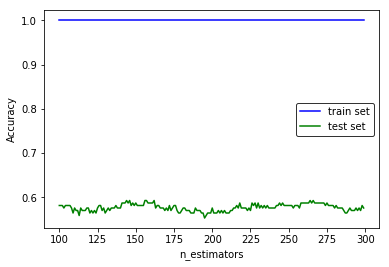

In [103]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(100,300)  # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=10,class_weight="balanced")
    classifier_new.fit(new_x_train,new_y_train)
    train_acc.append(classifier_new.score(new_x_train,new_y_train))
    test_acc.append(classifier_new.score(new_x_test,new_y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best n_estimators: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Best max_features: 1
Best accuracy for test set 59.32203389830508%
0.4887005649717514


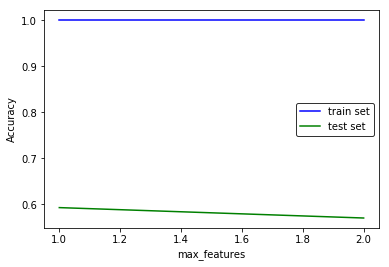

In [107]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(1,3) # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = RandomForestClassifier(n_estimators=144,max_features= k, oob_score=True, random_state=10,class_weight="balanced")
    classifier_new.fit(new_x_train,new_y_train)
    train_acc.append(classifier_new.score(new_x_train,new_y_train))
    test_acc.append(classifier_new.score(new_x_test,new_y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best max_features: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%".format(max(test_acc)*100))
print(classifier_new.oob_score_)

In [120]:
test_ks1 = range(10,30)
test_ks2 = range(2,20,2)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=144,max_features=1,max_depth=k1,min_samples_split=k2, oob_score=True, random_state=10,class_weight="balanced")
        classifier_new.fit(new_x_train,new_y_train)
        train_acc.append(classifier_new.score(new_x_train,new_y_train))
        test_acc.append(classifier_new.score(new_x_test,new_y_test))
    print("When max_depth is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 10
Best min_samples_split: 8
Best accuracy for test set 57.6271186440678%
0.4872881355932203


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 11
Best min_samples_split: 8
Best accuracy for test set 57.06214689265536%
0.4971751412429379


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 12
Best min_samples_split: 2
Best accuracy for test set 58.19209039548022%
0.5028248587570622


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 13
Best min_samples_split: 6
Best accuracy for test set 59.887005649717516%
0.4830508474576271


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 14
Best min_samples_split: 2
Best accuracy for test set 58.19209039548022%
0.4957627118644068


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 15
Best min_samples_split: 2
Best accuracy for test set 59.887005649717516%
0.5042372881355932


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 16
Best min_samples_split: 2
Best accuracy for test set 57.6271186440678%
0.4985875706214689


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 17
Best min_samples_split: 2
Best accuracy for test set 57.6271186440678%
0.5070621468926554


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 18
Best min_samples_split: 6
Best accuracy for test set 59.887005649717516%
0.5098870056497176


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 19
Best min_samples_split: 8
Best accuracy for test set 59.32203389830508%
0.4957627118644068


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 20
Best min_samples_split: 2
Best accuracy for test set 59.32203389830508%
0.4985875706214689


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 21
Best min_samples_split: 2
Best accuracy for test set 59.887005649717516%
0.5042372881355932


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 22
Best min_samples_split: 2
Best accuracy for test set 58.75706214689266%
0.4985875706214689


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 23
Best min_samples_split: 2
Best accuracy for test set 57.6271186440678%
0.5


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 24
Best min_samples_split: 6
Best accuracy for test set 57.6271186440678%
0.501412429378531


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 25
Best min_samples_split: 2
Best accuracy for test set 60.451977401129945%
0.5028248587570622


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 26
Best min_samples_split: 2
Best accuracy for test set 58.19209039548022%
0.4957627118644068


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 27
Best min_samples_split: 6
Best accuracy for test set 57.6271186440678%
0.4957627118644068


  0%|          | 0/9 [00:00<?, ?it/s]

When max_depth is 28
Best min_samples_split: 2
Best accuracy for test set 58.19209039548022%
0.4971751412429379


100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

When max_depth is 29
Best min_samples_split: 8
Best accuracy for test set 57.6271186440678%
0.4985875706214689


In [122]:
test_ks1 = range(1,15)
test_ks2 = range(2,15)  # list containing values of k to be tested
for k1 in (test_ks1):
    train_acc = list()
    test_acc = list() # list storing the test set accuracies
    for k2 in tqdm.tqdm(test_ks2):
        classifier_new = RandomForestClassifier(n_estimators=144,max_features=1,max_depth=25,min_samples_leaf=k1,min_samples_split=k2, oob_score=True, random_state=10,class_weight="balanced")
        classifier_new.fit(new_x_train,new_y_train)
        train_acc.append(classifier_new.score(new_x_train,new_y_train))
        test_acc.append(classifier_new.score(new_x_test,new_y_test))
    print("When min_samples_leaf is {}".format(k1))
    print("Best min_samples_split: {}".format(test_ks2[np.argmax(test_acc)]))
    print("Best accuracy for test set {}%".format(max(test_acc)*100))
    print(classifier_new.oob_score_)

  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 1
Best min_samples_split: 2
Best accuracy for test set 60.451977401129945%
0.481638418079096


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 2
Best min_samples_split: 8
Best accuracy for test set 57.6271186440678%
0.4759887005649718


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 3
Best min_samples_split: 8
Best accuracy for test set 57.6271186440678%
0.5


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 4
Best min_samples_split: 10
Best accuracy for test set 57.06214689265536%
0.4872881355932203


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 5
Best min_samples_split: 12
Best accuracy for test set 56.49717514124294%
0.5056497175141242


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 6
Best min_samples_split: 2
Best accuracy for test set 57.06214689265536%
0.4915254237288136


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 7
Best min_samples_split: 2
Best accuracy for test set 56.49717514124294%
0.4745762711864407


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 8
Best min_samples_split: 2
Best accuracy for test set 57.6271186440678%
0.4887005649717514


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 9
Best min_samples_split: 2
Best accuracy for test set 58.75706214689266%
0.4788135593220339


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 10
Best min_samples_split: 2
Best accuracy for test set 59.32203389830508%
0.4858757062146893


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 11
Best min_samples_split: 2
Best accuracy for test set 59.887005649717516%
0.4858757062146893


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 12
Best min_samples_split: 2
Best accuracy for test set 60.451977401129945%
0.4901129943502825


  0%|          | 0/13 [00:00<?, ?it/s]

When min_samples_leaf is 13
Best min_samples_split: 2
Best accuracy for test set 60.451977401129945%
0.4929378531073446


100%|██████████| 13/13 [00:04<00:00,  2.77it/s]

When min_samples_leaf is 14
Best min_samples_split: 2
Best accuracy for test set 57.6271186440678%
0.4901129943502825


In [124]:
new_classifier_final = RandomForestClassifier(n_estimators=144,max_features=1,max_depth=25,min_samples_leaf=1,min_samples_split=2, oob_score=True, random_state=10,class_weight="balanced")
new_classifier_final.fit(new_x_train,new_y_train)
print(new_classifier_final.predict(new_x_test))
print("Out-of bag score:%f"%new_classifier_final.oob_score_)
print("Accuracy of train set {}%".format(new_classifier_final.score(new_x_train,new_y_train)*100))
print("Accuracy of test set {}%".format(new_classifier_final.score(new_x_test,new_y_test)*100))

[ 1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
  1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
 -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.]
Out-of bag score:0.488701
Accuracy of train set 100.0%
Accuracy of test set 60.451977401129945%


Training Set:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       336
         1.0       1.00      1.00      1.00       372

    accuracy                           1.00       708
   macro avg       1.00      1.00      1.00       708
weighted avg       1.00      1.00      1.00       708

[[336   0]
 [  0 372]]


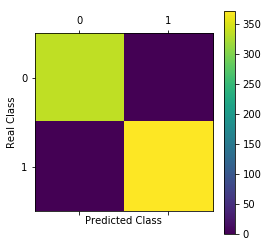

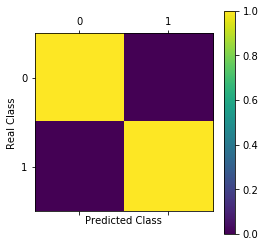

In [125]:
new_y_pred_train = new_classifier_final.predict(new_x_train)
report = classification_report(y_true=new_y_train,y_pred=new_y_pred_train)
matrix = confusion_matrix(y_true=new_y_train,y_pred=new_y_pred_train)
normalized_matrix = matrix/np.sum(matrix,axis=1)
print("Training Set:")
print(report)
print(matrix)

plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

Test Set:
              precision    recall  f1-score   support

        -1.0       0.67      0.63      0.65       103
         1.0       0.53      0.57      0.55        74

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.61      0.60      0.61       177

[[65 38]
 [32 42]]
[[0.63106796 0.51351351]
 [0.31067961 0.56756757]]


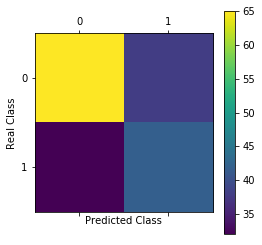

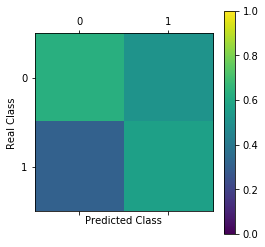

In [126]:
new_y_pred_test = new_classifier_final.predict(new_x_test)
report = classification_report(y_true=new_y_test,y_pred=new_y_pred_test)
matrix = confusion_matrix(y_true=new_y_test,y_pred=new_y_pred_test)
normalized_matrix = matrix/np.sum(matrix,axis=1)

print("Test Set:")
print(report)
print(matrix)
print(normalized_matrix)


plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

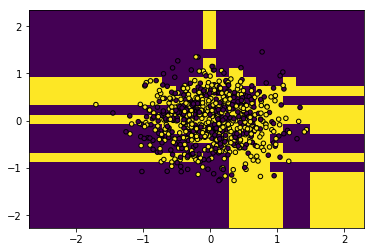

In [127]:
from matplotlib.colors import ListedColormap

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries( new_classifier_final,new_x_train,new_y_train)